<a href="https://colab.research.google.com/github/bekka9/Time_serias_lab/blob/main/lab5_sydygalieva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statistics as stat
import statsmodels

from sklearn.linear_model import LinearRegression
import matplotlib
from matplotlib import pyplot as plt

## ОЦЕНКА ТРЕНДА И ПЕРИОДИЧЕСКОЙ СОСТАВЛЯЮЩЕЙ

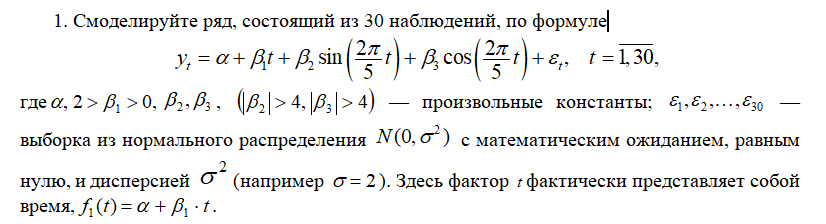

In [ ]:
eps = stats.norm(loc=0, scale=3).rvs(size=30)
alpha = 27
betha1 = 15
betha2 = 2.75
betha3 = -7

#t = stats.norm(loc=1, scale=8).rvs(size=30)
#t.sort()
t = np.array(list(range(1, 31)))
y = alpha + betha1 * t + betha2 * np.sin(2*t *np.pi/5) + betha3 * np.cos(2*t*np.pi/5) + eps
y = np.array(y)

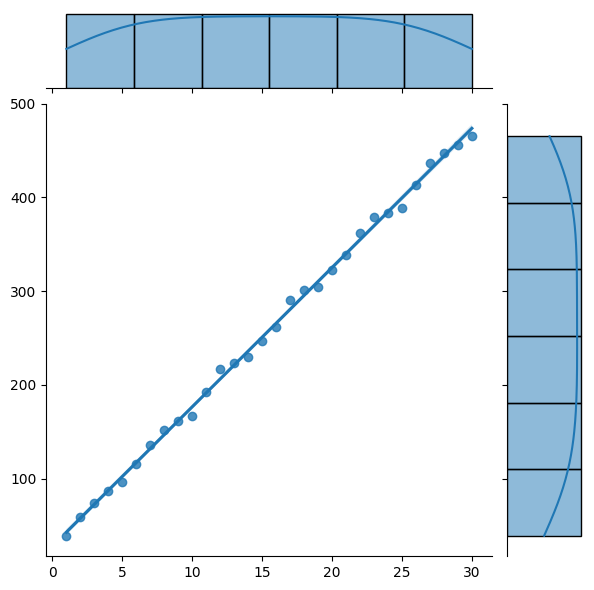

In [ ]:
import seaborn as sns
axes = sns.jointplot(
    x=t, y=y,
    kind='reg')
plt.show()

In [ ]:
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [ ]:
y

array([ 39.0867061 ,  59.22280657,  74.34125854,  86.33137802,
        96.51940892, 115.30535206, 136.32931759, 152.39840967,
       161.74995392, 167.02892607, 192.52652831, 216.46092996,
       223.54700379, 229.43994027, 246.67892053, 261.57581227,
       290.55536744, 301.74424298, 304.6060918 , 322.45955838,
       338.61388097, 362.56773405, 379.60175283, 383.27680723,
       388.27009314, 413.39386394, 437.20246916, 447.12913403,
       456.2818572 , 465.37970565])

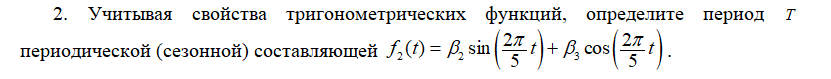

In [ ]:
f_2 = betha2 * np.sin(2* np.pi/5 * t) + betha3 * np.cos(2 * np.pi/5 * t)
#T - период сезонной компоненты: 5
T = 5

t2 =  np.sin(2* np.pi/5 * t)
t3 = np.cos(2 * np.pi/5 * t)

import statsmodels.api as sm
import statsmodels.formula.api as smf
df = pd.DataFrame({'t': t,
                   't2': t2,
                   't3': t3,
                   'y': y})
model = smf.ols(formula='y ~ t + t2 + t3', data=df)
result_ = model.fit()
print(result_.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.053e+04
Date:                Sat, 18 May 2024   Prob (F-statistic):           5.64e-44
Time:                        08:31:44   Log-Likelihood:                -71.747
No. Observations:                  30   AIC:                             151.5
Df Residuals:                      26   BIC:                             157.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.1113      1.072     25.294      0.0

In [ ]:
print(result_.params, type(result_.params))

Intercept    27.111322
t            14.916743
t2            0.976399
t3           -7.235354
dtype: float64 <class 'pandas.core.series.Series'>


In [ ]:
a1 = result_.params['Intercept']
b11 = result_.params['t']
b21 = result_.params['t2']
b31 = result_.params['t3']

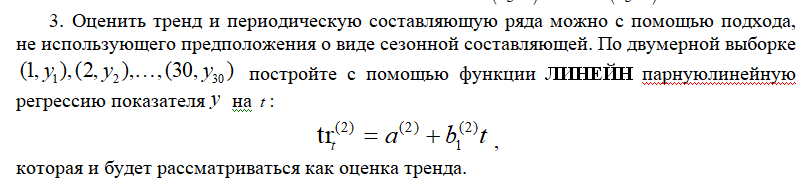

оценка тренда имеет вид

In [ ]:
#По двумерной выборке  строится парная регрессия показателя y на t:
trend = pd.DataFrame({'t': t,
                   'y': y})
model_linear_ols = smf.ols(formula='y ~ t', data=trend)
result_linear_ols = model_linear_ols.fit()
print(result_linear_ols.summary())
a_tr = result_linear_ols.params['Intercept']
b_tr = result_linear_ols.params['t']

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.387e+04
Date:                Sat, 18 May 2024   Prob (F-statistic):           2.72e-39
Time:                        08:34:16   Log-Likelihood:                -95.197
No. Observations:                  30   AIC:                             194.4
Df Residuals:                      28   BIC:                             197.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.9988      2.240     12.498      0.0

In [ ]:
#оценка линейного тренда.
tr_t = a_tr + b_tr* t
tr_t

array([ 42.85831502,  57.71779952,  72.57728403,  87.43676854,
       102.29625305, 117.15573756, 132.01522206, 146.87470657,
       161.73419108, 176.59367559, 191.45316009, 206.3126446 ,
       221.17212911, 236.03161362, 250.89109813, 265.75058263,
       280.61006714, 295.46955165, 310.32903616, 325.18852067,
       340.04800517, 354.90748968, 369.76697419, 384.6264587 ,
       399.48594321, 414.34542771, 429.20491222, 444.06439673,
       458.92388124, 473.78336574])

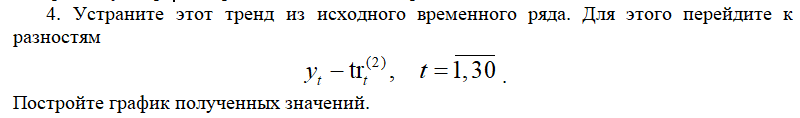

<Axes: >

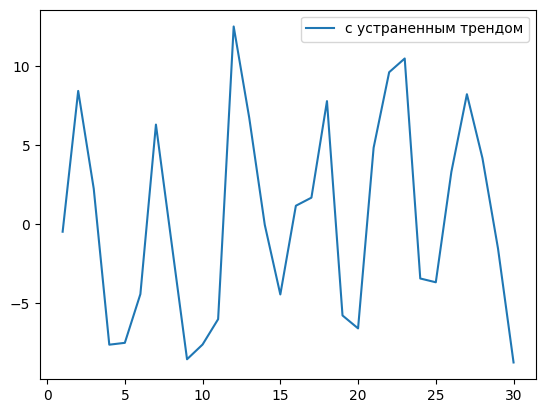

In [ ]:
#Для оценки сезонной (периодической) компоненты необходимо устранить тренд из временного ряда.
y_ = y - tr_t

import seaborn as sns
sns.lineplot(x=t, y=y_, label="c устраненным трендом")
#sns.lineplot(x=t, y=y, color='r', label="исходный")

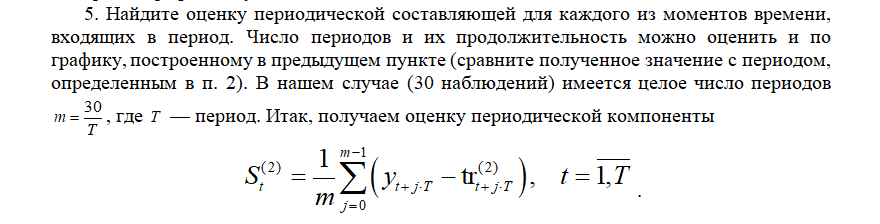

In [ ]:

m = int(30 / T)
#оценка периодической составляющей
S_t = [0]*T

for i in range (0, T):
  sum = 0
  for j in range (0, m):
    sum += y[i + j*T] - tr_t[i + j*T]
  S_t[i] = sum / m

print("Оценка периодической составляющей для каждого из моментов времени, входящих в период")
S_t

Оценка периодической составляющей для каждого из моментов времени, входящих в период


[-0.2606697205341379,
 7.800735427472258,
 5.055604574309572,
 -4.48730559644919,
 -6.425545633290402]

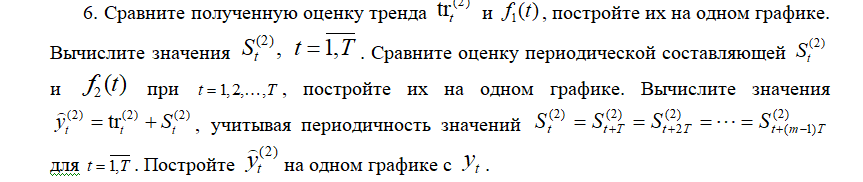

<Axes: >

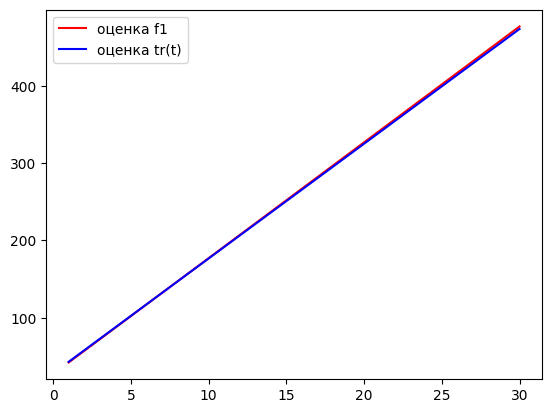

In [ ]:
f_1 = alpha + betha1*t

sns.lineplot(x=t, y=f_1, color='r', label="оценка f1")
sns.lineplot(x=t, y=tr_t, color='b', label="оценка tr(t)")

<Axes: >

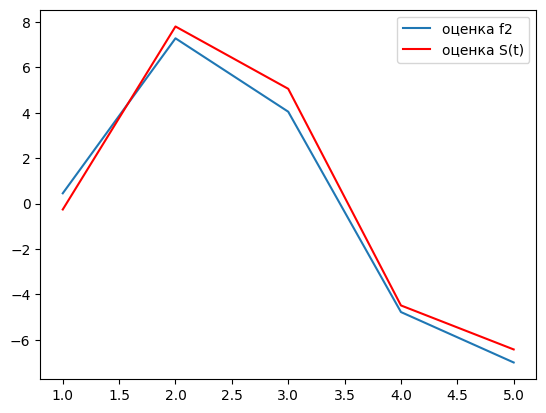

In [ ]:
sns.lineplot(x=t[0:T], y=f_2[0:T], label="оценка f2")
sns.lineplot(x=t[0:T], y=S_t, color='r', label="оценка S(t)")


In [ ]:
for i in t[T:30]:
  S_t.append(S_t[i%T])
y_t = tr_t + S_t
y_t

array([ 42.5976453 ,  65.51853495,  77.63288861,  82.94946294,
        95.87070741, 124.95647298, 137.07082664, 142.38740097,
       155.30864545, 176.33300587, 199.25389552, 211.36824918,
       216.68482351, 229.60606799, 250.63042841, 273.55131806,
       285.66567172, 290.98224605, 303.90349052, 324.92785095,
       347.8487406 , 359.96309426, 365.27966859, 378.20091306,
       399.22527348, 422.14616314, 434.2605168 , 439.57709113,
       452.4983356 , 473.52269602])

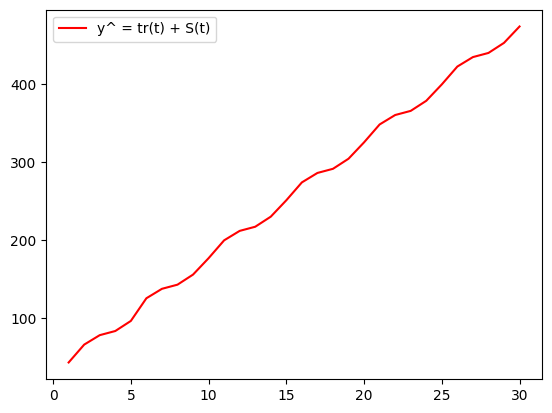

In [ ]:
sns.lineplot(x=t, y=y_t, color='r', label="y^ = tr(t) + S(t)")
#sns.lineplot(x=t, y=y, color='b', label="y")

plt.show()

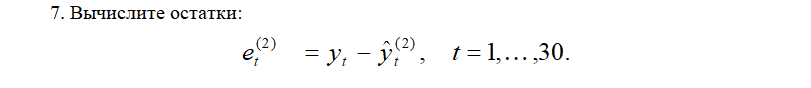

In [ ]:

y_pred = a1 + b11 * t + b21 * t2 + b31 * t3
e_ = y - y_pred
e = y - y_t

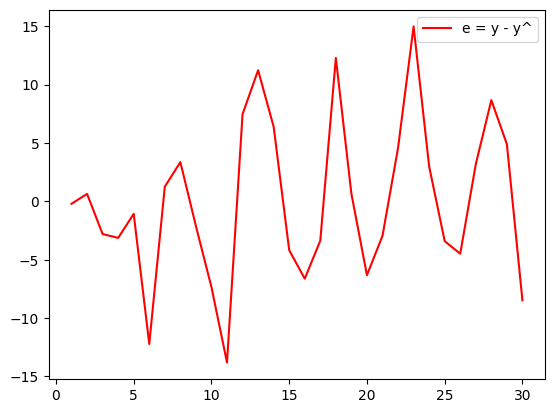

In [ ]:
sns.lineplot(x=t, y=e, color='r', label="e = y - y^")
#sns.lineplot(x=t, y=e_t, color='b', label="e = y - y_pred")
plt.show()


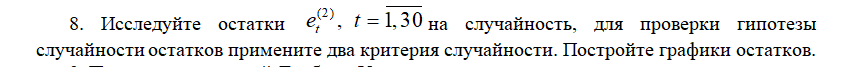

критерий Дарбина-Уотсона:

In [ ]:
e_t = e
sum1 = 0
sum2 = e_t[0]**2
for i in range (1, len(t)):
  sum1 += (e_t[i] - e_t[i - 1])**2
  sum2 += e_t[i]**2
d = sum1/sum2
print(d)

1.5200186959418


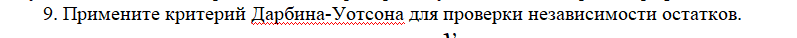

In [ ]:
n = 30
p = 0.95
m = 3
d_L = 1.21
d_U =	1.65
if (d <= 2):
  if (d < d_L):
    print("гипотеза о независимости случайных отклонений отвергается")
  elif (d > d_U):
    print("гипотеза о независимости случайных отклонений не отвергается")
  elif (d >= d_L and d <= d_U):
    print("нет достаточных оснований для принятия решения")
else:
  if (4 - d < d_L):
    print("гипотеза о независимости случайных отклонений отвергается")
  elif (4 - d > d_U):
    print("гипотеза о независимости случайных отклонений не отвергается")
  elif (4 - d >= d_L and 4 - d <= d_U):
    print("нет достаточных оснований для принятия решения")

нет достаточных оснований для принятия решения


In [ ]:
#durbin_watson(result_.resid)

In [ ]:
t_pr1 = np.array([31, 34, 37, 41])
t_pr2 =  np.sin(2* np.pi/5 * t_pr1)
t_pr3 = np.cos(2 * np.pi/5 * t_pr1)
y_pred1 = a1 + b11 * t_pr1 + b21 * t_pr2 + b31 * t_pr3
y_pred1

array([488.22312204, 531.11613063, 585.45825536, 637.39055345])

In [ ]:
tr_pred = a_tr + b_tr* t_pr1
S_pred = [S_t[31%T], S_t[34%T], S_t[37%T], S_t[41%T]]
y__ = tr_pred + S_pred
y__

array([496.44358568, 526.79575814, 582.85536187, 645.03843076])

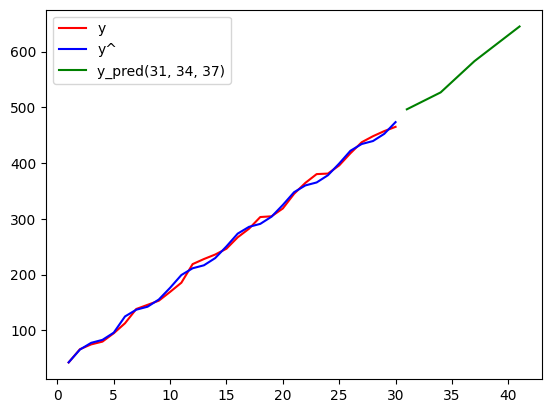

In [ ]:
sns.lineplot(x=t, y=y, color='r', label="y")
sns.lineplot(x=t, y=y_t, color='b', label="y^")
sns.lineplot(x=t_pr1, y=y__, color='g', label="y_pred(31, 34, 37)")
plt.show()

#Сглаживание временного ряда

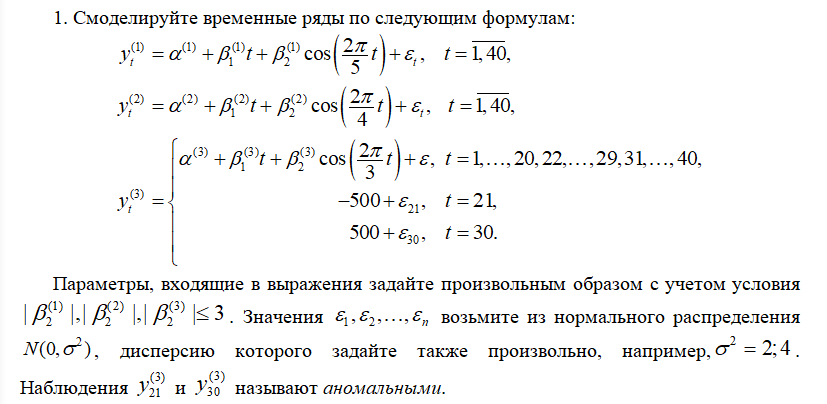

In [ ]:
eps = stats.norm(loc=0, scale=4).rvs(size=40)
alpha1 = 27
betha1_1 = 1.3
betha1_2 = 2.75
betha1_3 = -1
alpha2 = 55
betha2_1 = 0.75
betha2_2 = 2.85
betha2_3 = 1.49
alpha3 = 13
betha3_1 = -0.75
betha3_2 = 1.035
betha3_3 = 2.49

#t = stats.norm(loc=1, scale=8).rvs(size=30)
#t.sort()
t = np.array(list(range(1, 41)))
y_1 = alpha1 + betha1_1 * t + betha1_2 * np.sin(2*np.pi/5 * t) + betha1_3 * np.cos(2*np.pi/5 * t) + eps
y_1 = np.array(y_1)
y_2 = alpha2 + betha2_1 * t + betha2_2 * np.sin(2*np.pi/5 * t) + betha2_3 * np.cos(2*np.pi/5 * t) + eps
y_2 = np.array(y_2)
y_3 = alpha3 + betha3_1 * t + betha3_2 * np.sin(2*np.pi/5 * t) + betha3_3 * np.cos(2*np.pi/5 * t) + eps
y_3 = np.array(y_3)
y_3[20] = -500 + eps[2]
y_3[29] = 500 + eps[30]

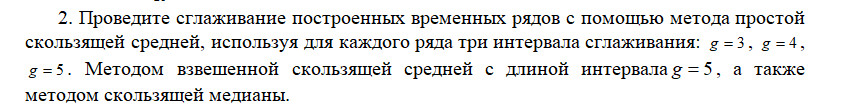

In [ ]:
y

array([ 36.92338549,  58.17037024,  77.45798853,  81.13260792,
        92.94034641, 115.61610829, 139.0321136 , 150.19684607,
       148.411562  , 165.12722065, 186.90964761, 206.30452706,
       212.60453721, 224.6106889 , 237.21226734, 263.77687602,
       281.58080286, 297.00048197, 301.02508539, 321.36093968,
       339.04120416, 363.4301468 , 368.25682943, 375.64873119,
       386.94060271, 414.41676686, 437.49685603, 447.7325502 ,
       453.84850074, 464.21675762])

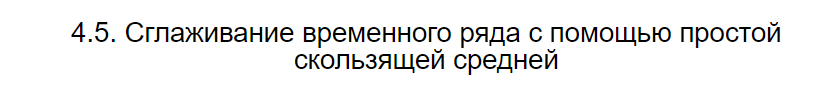

In [ ]:
#сглаживание построенных временных рядов с помощью метода простой скользящей средней
g1, p1 = 3, 1
g2, p2 = 4, 2
g3, p3 = 5, 2
g = 5
p = 2
t = np.array(list(range(1, 41)))
n = len(t)

y = [y_1, y_2, y_3]
y_pr_ss =[]
for j in range (3):
  y_3s = [0]*n
  for i in range (2, n - 2):
    y_3s[i] = (y[j][i - 2] + y[j][i - 1] + y[j][i] + y[j][i + 1] + y[j][i + 2]) / 5
  y_3s[0:2] = y[j][0:2]
  y_3s[n - 2:n] = y[j][n - 2:n]

  y_1s = [0]*n
  for i in range (1, n - 1):
    y_1s[i] = (y[j][i - 1] + y[j][i] + y[j][i + 1]) / 3
  y_1s[0] = y[j][0]
  y_1s[n - 1] = y[j][n - 1]

  y_2s = [0]*n
  for i in range (2, n - 2):
    y_2s[i] = (y[j][i - 2]/2 + y[j][i - 1] + y[j][i] + y[j][i + 1] + y[j][i + 2]/2) / 4
  y_2s[0:2] = y[j][0:2]
  y_2s[n - 2:n] = y[j][n - 2:n]
  y_pr_ss.append([y_1s, y_1s, y_1s])


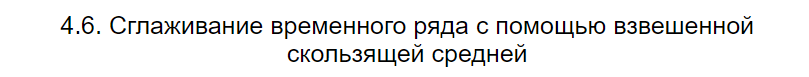

In [ ]:
g = 5
p = 2
y_pr_vss = []
for j in range (3):
  y_v = [0]*n
  for i in range (2, n - 2):
    y_v[i] = (-3 * y[j][i - 2] + 12* y[j][i - 1] + 17 * y[j][i] + 12 * y[j][i + 1] - 3* y[j][i + 2]) / 35
  y_v[0:2] = y[j][0:2]
  y_v[n - 2:n] = y[j][n - 2:n]
  y_pr_vss.append(y_v)

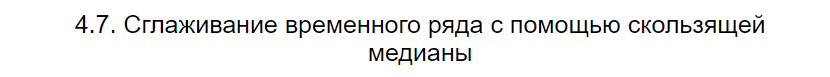

In [ ]:
def med(x, y, z):
  if ((y <= x and x <= z) or (z <= x and x <= y)):
    return x
  elif ((x <= y and y <= z) or (z <= y and y <= x)):
    return y
  elif ((x <= z and z <= y) or (y <= z and z <= x)):
    return z
y_pr_sm = []
for j in range (3):
  y_v = [0]*n
  for i in range (1, n - 1):
    y_v[i] = med(y[j][i - 1], y[j][i], y[j][i + 1])
  y_v[0] = y[j][0]
  y_v[n - 1] = y[j][n - 1]
  y_pr_sm.append(y_v)

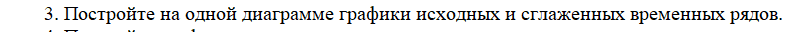

### Графики:

красные линии - сглаженные временные ряды
синие - исходные

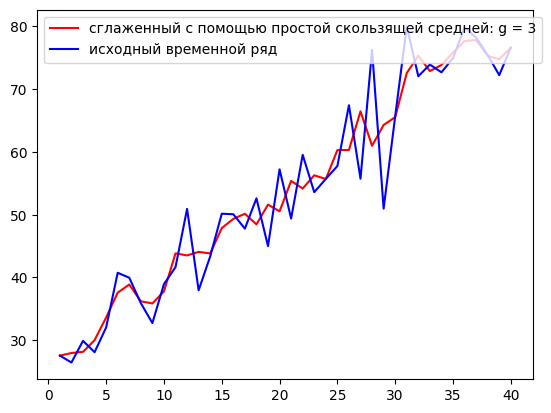

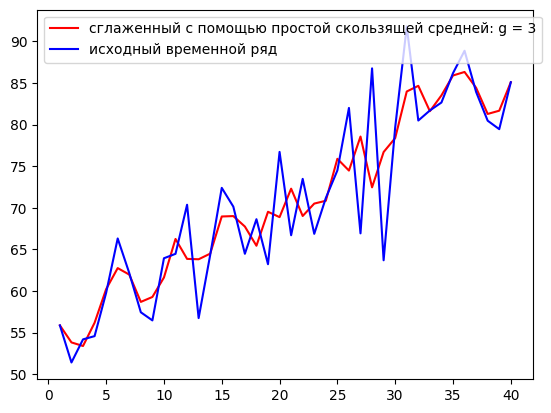

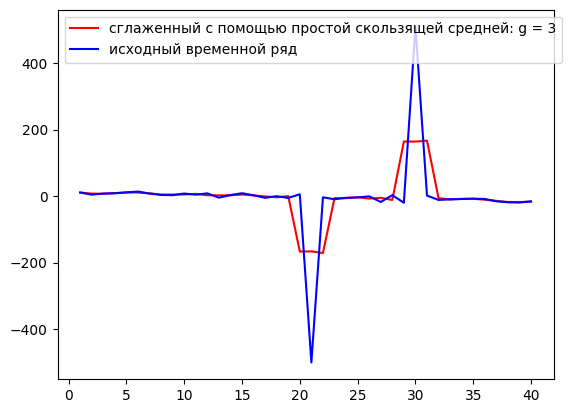

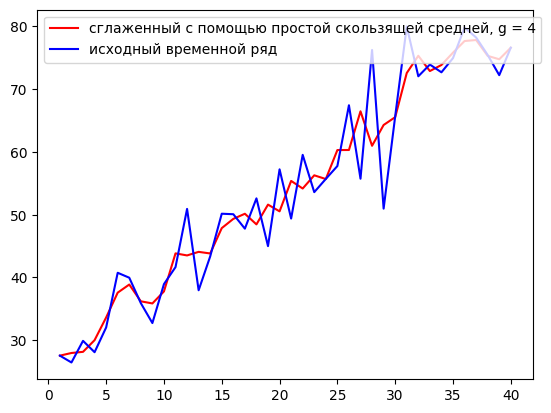

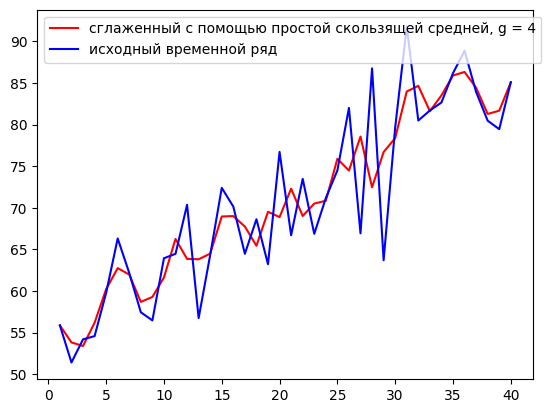

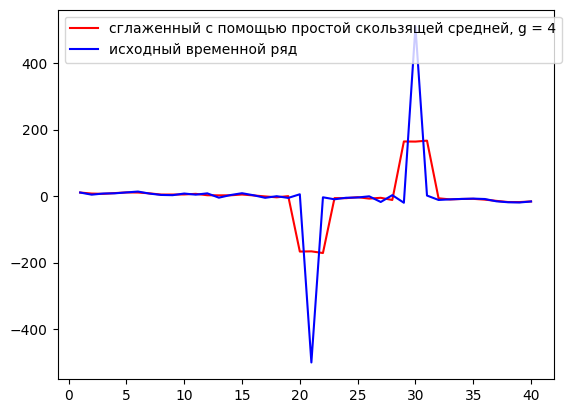

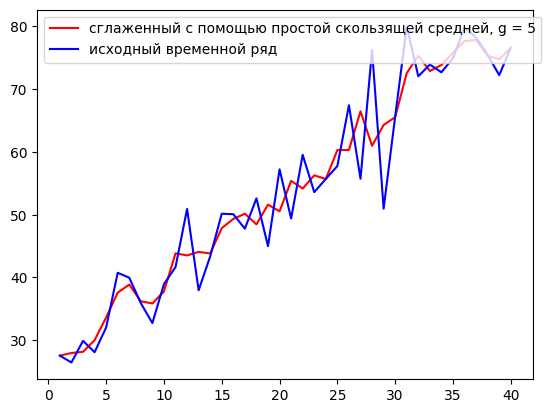

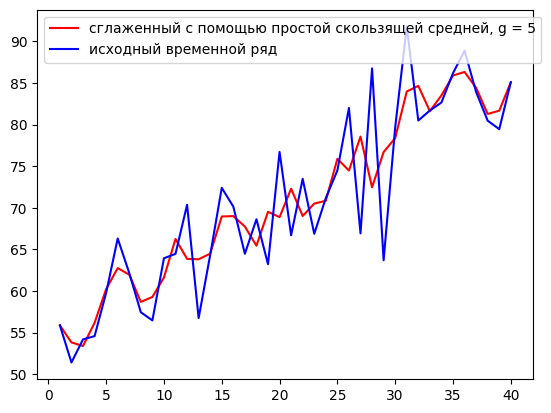

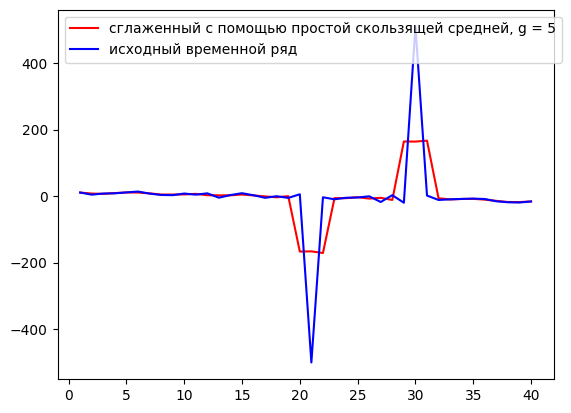

In [ ]:
method = ["сглаженный с помощью простой скользящей средней: g = 3", "сглаженный с помощью простой скользящей средней, g = 4", "сглаженный с помощью простой скользящей средней, g = 5"]
for i in range (3):
  for j in range (3):
    sns.lineplot(x=t, y=y_pr_ss[j][i], color='r', label=method[i])
    sns.lineplot(x=t, y=y[j], color='b', label="исходный временной ряд")
    plt.legend(loc="upper left")
    plt.show()

Взвешенная скользящая средняя

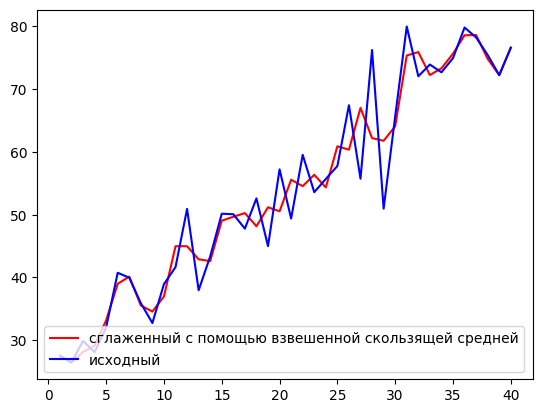

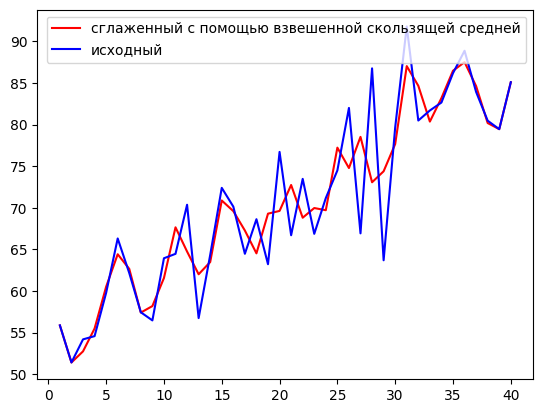

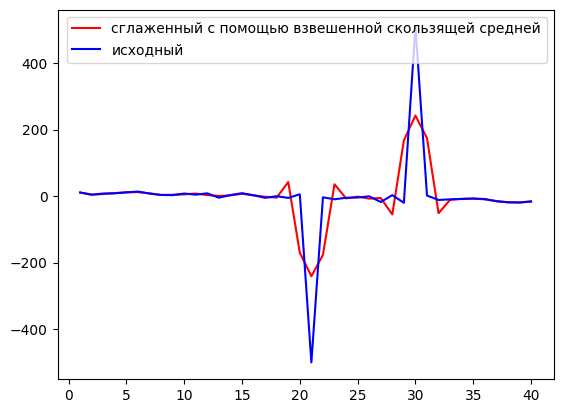

In [ ]:
for i in range (3):
  sns.lineplot(x=t, y=y_pr_vss[i], color='r', label="сглаженный с помощью взвешенной скользящей средней")
  sns.lineplot(x=t, y=y[i], color='b', label="исходный")
  plt.show()

Скользящая медиана

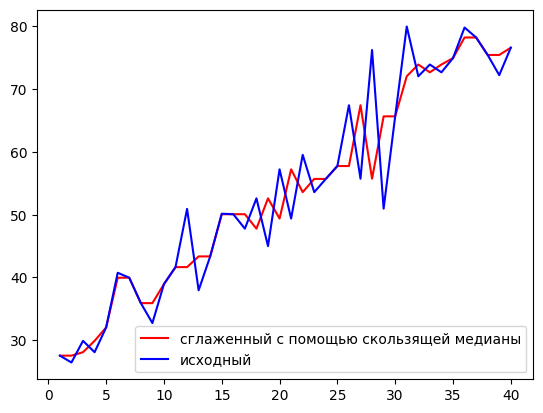

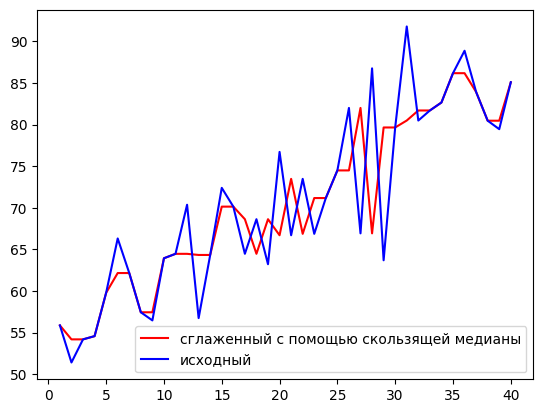

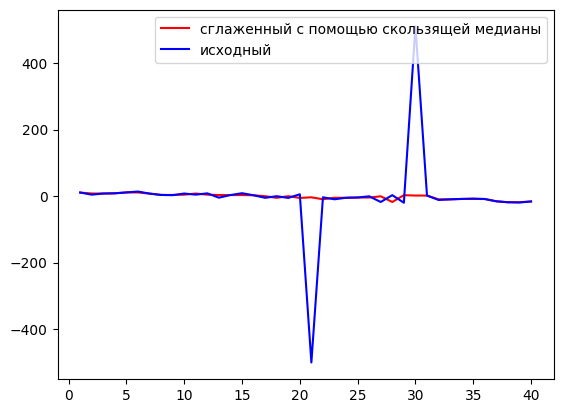

In [ ]:
for i in range (3):
  sns.lineplot(x=t, y=y_pr_sm[i], color='r', label="сглаженный с помощью скользящей медианы")
  sns.lineplot(x=t, y=y[i], color='b', label="исходный")
  plt.show()

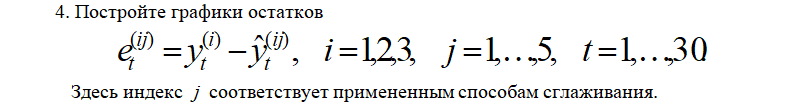

Графики остатков для каждого временного ряда(остатки для каждогот способа сглаживания изображены на одном графике)

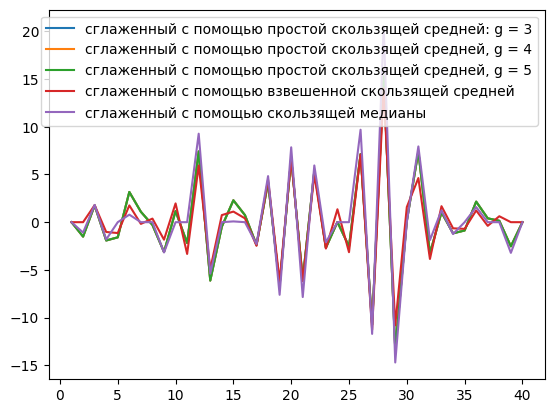

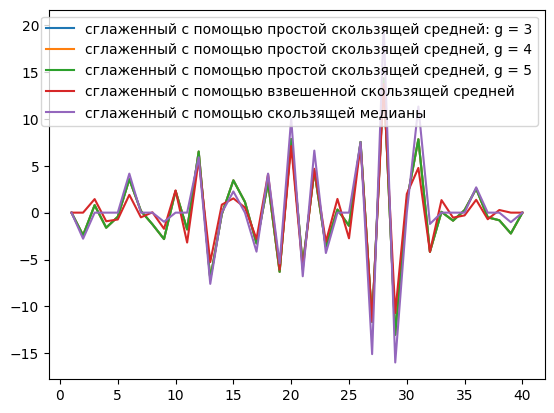

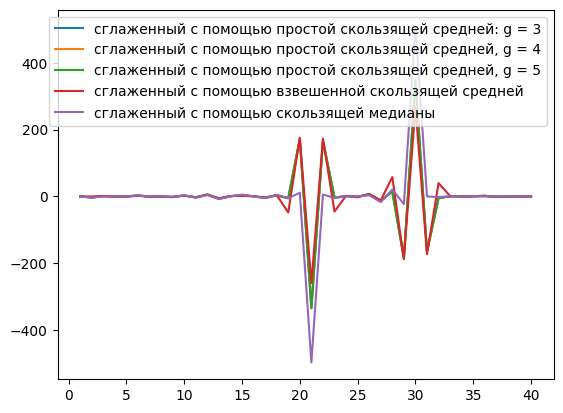

In [ ]:
e_t = []
for i in range (3):
    e_t.append([y[i] - y_pr_ss[i][0], y[i] - y_pr_ss[i][1], y[i] - y_pr_ss[i][2], y[i] - y_pr_vss[i],y[i] -  y_pr_sm[i]])
method = ["сглаженный с помощью простой скользящей средней: g = 3", "сглаженный с помощью простой скользящей средней, g = 4", "сглаженный с помощью простой скользящей средней, g = 5", "сглаженный с помощью взвешенной скользящей средней", "сглаженный с помощью скользящей медианы"]
for i in range (3):
  for j in range (5):
    sns.lineplot(x=t, y=e_t[i][j], label=method[j])
  plt.show()